In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Data Loading and Overview¶

### 1.1 Load the Data

In [7]:
# load datasets
ML_PATH = "../data/raw/ml-latest-small/"
movies_df = pd.read_csv(f"{ML_PATH}/movies.csv")
ratings_df = pd.read_csv(f"{ML_PATH}/ratings.csv")
links_df = pd.read_csv(f"{ML_PATH}/links.csv")
movies_df.head()
ratings_df.head()

# merge df
df = pd.merge(ratings_df, movies_df, on='movieId')
movies_links = pd.merge(movies_df, links_df,   on="movieId", how="left")
merged = pd.merge(movies_links, ratings_df, on="movieId", how="left")
merged = merged.dropna(subset=["tmdbId"])

merged.head()

,movieId,title,genres,imdbId,tmdbId,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,17.0,4.5,1.305696e+09


### 1.2  Inspect Data Quality

In [ ]:
movies_df.info()
movies_df.isnull().sum()
movies_df.duplicated().sum()

ratings_df.info()
ratings_df.isnull().sum()
ratings_df.duplicated().sum()


## Step 2: Exploratory Visualizations

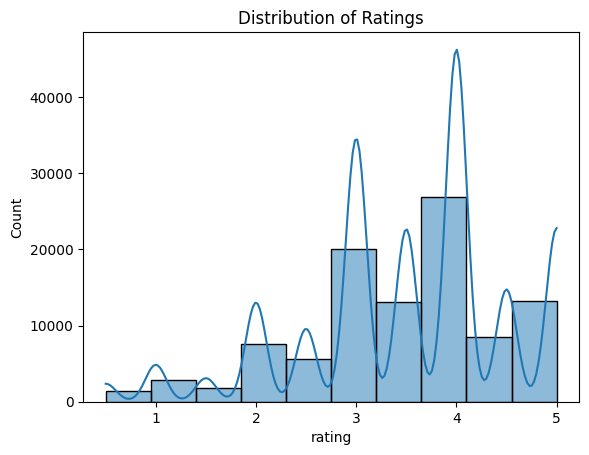

In [22]:
sns.histplot(df["rating"], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.show()

### 2.2: Highest-Rated Movies

In [ ]:
rating_counts = df.groupby("title")['rating'].count().sort_values(ascending=False)
rating_counts.head(20)

title
'71 (2014)                                                                        1
Latter Days (2003)                                                                1
Late Shift, The (1996)                                                            1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)    1
Late Night Shopping (2001)                                                        1
Late Marriage (Hatuna Meuheret) (2001)                                            1
Last of the Dogmen (1995)                                                         1
Last Year's Snow Was Falling (1983)                                               1
Last Winter, The (2006)                                                           1
Last Wedding, The (Kivenpyörittäjän kylä) (1995)                                  1
Last Wave, The (1977)                                                             1
Last Waltz, The (1978)                                                

### 2.2 Highest-Rated Movies (with a Minimum Threshold)

In [ ]:
# 1) Group ratings by movie title
grouped = merged.groupby("title")["rating"]

# 2) Create a new DataFrame with mean rating and rating count
aggregate = merged.groupby("title").agg({
    "rating": ["mean", "count", "size"]

})
ratings_summary = pd.DataFrame({
    "mean_rating": grouped.mean(),
    "count": grouped.count()
})

# 3) Filter out movies with fewer than 50 ratings
ratings_summary = ratings_summary[ratings_summary["count"] > 100]

# 4) Sort by mean rating (descending) and take the top 10
top_rated = ratings_summary.sort_values("mean_rating", ascending=False).head(10)

# top_rated
# grouped.head()
# ratings_summary.head()
aggregate.sort_values(by=('rating', 'count'), ascending=False)


rating           
                                               mean count size
title                                                         
Forrest Gump (1994)                        4.164134   329  329
Shawshank Redemption, The (1994)           4.429022   317  317
Pulp Fiction (1994)                        4.197068   307  307
Silence of the Lambs, The (1991)           4.161290   279  279
Matrix, The (1999)                         4.192446   278  278
...                                             ...   ...  ...
King Solomon's Mines (1950)                3.000000     1    1
King Solomon's Mines (1937)                2.500000     1    1
King Ralph (1991)                          1.500000     1    1
King Kong Lives (1986)                     2.000000     1    1
À nous la liberté (Freedom for Us) (1931)  1.000000     1    1

[9719 rows x 3 columns]

### Genres Analysis

In [ ]:
# counting how many times each genre appears
from collections import Counter


#Code A(option1)
# df_exploded = df.assign(
#     genre=df["genres"].str.split("|")
# ).explode("genre")
# genre_counts = df_exploded.groupby("genre")["rating"].count()
# genre_counts.sort_values(ascending=False, inplace=True)

 

# CodeB(option2=> simpler and easy to read)
# genre_counts.head(10)  
merged['genres_list'] =  merged['genres'].apply(lambda x: x.split("|"))
all_genres = []
for g_list in merged['genres_list']:
    all_genres.extend(g_list)
     

all_genres
genres_count = Counter(all_genres)
genres_count




Counter({'Drama': 41928,
         'Comedy': 39053,
         'Action': 30635,
         'Thriller': 26452,
         'Adventure': 24161,
         'Romance': 18124,
         'Sci-Fi': 17243,
         'Crime': 16681,
         'Fantasy': 11834,
         'Children': 9208,
         'Mystery': 7674,
         'Horror': 7291,
         'Animation': 6988,
         'War': 4859,
         'IMAX': 4145,
         'Musical': 4138,
         'Western': 1930,
         'Documentary': 1219,
         'Film-Noir': 870,
         '(no genres listed)': 47})

## Typical Rating & User Insights

1. Average Rating:

In [ ]:
overall_mean = merged["rating"].mean()
print(f"Overall average rating: {overall_mean:.2f}")


Overall average rating: 3.50


2. Number of Unique Users / Movies:

In [8]:
n_users = merged["userId"].nunique()
n_movies = merged["tmdbId"].nunique()
print(f"Unique Users: {n_users}, Unique Movies: {n_movies}")



Unique Users: 610, Unique Movies: 9733


3. Ratings per User:

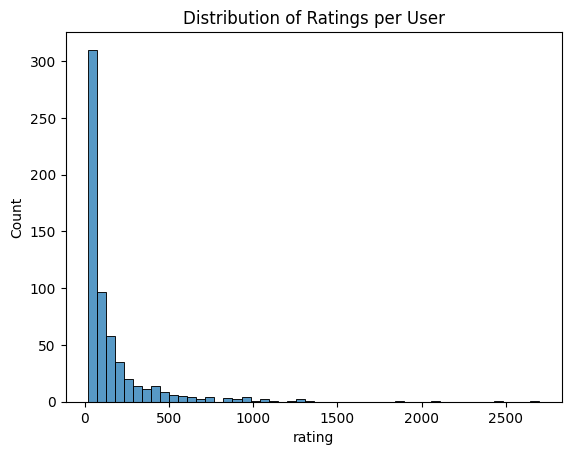

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64

In [9]:
user_activity = merged.groupby("userId")["rating"].count()
sns.histplot(user_activity, bins=50)
plt.title("Distribution of Ratings per User")
plt.show()
user_activity


In [ ]:
merged.head()

,userId,movieId,rating,timestamp,title,genres,genres_list
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,"[Mystery, Thriller]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,"[Crime, Mystery, Thriller]"


## Example “Teacher” Scenario
Let’s say you’re building a brand-new streaming platform. You’ve done EDA and discovered:

Global average rating = 3.5

Top genres = Drama, Comedy, Action

A. Cold Start User
Sign-Up: A user just joined, no ratings yet.

Initial Suggestions: Your system uses the global average or the top genres to guess that people generally like comedic or action movies. So you show them a curated list of well-rated comedic or action titles.

User Feedback: The user rates a few movies. If they rate comedies highly, you reinforce that preference. If they rate action low, you pivot away from action.

B. Seasoned User
Has Ratings: This user has rated 30 movies, mostly action flicks at 4.0+ stars.

Refine: The model sees they’re an “action fan” and also knows from the global distribution that action movies are quite popular. So the system surfaces more action recommendations.

But: If the user tries a Drama with a 4.5 rating, your model might cross-reference other users who liked both Drama and Action, discovering new sub-genre patterns (e.g., “Action Thriller” or “Sci-Fi Action”).

In both cases, your EDA findings shape default assumptions and guide the model on how to handle new or partial data.

## Identify & Remove True Duplicates

In [10]:
# 1) Identify rows where userId & movieId appear more than once
duplicates = merged[merged.duplicated(subset=["userId", "movieId"], keep=False)]

# If duplicates is empty, it means you have no repeated pairs
print("Duplicates found:\n", duplicates.head())

# 2) If you decide to remove duplicates, you typically keep='first' or keep='last'
#    Here, we keep the FIRST occurrence and drop subsequent duplicates
df.drop_duplicates(subset=["userId", "movieId"], keep="first", inplace=True)


Duplicates found:
 Empty DataFrame
Columns: [movieId, title, genres, imdbId, tmdbId, userId, rating, timestamp]
Index: []


## Filter Out Users with Fewer Than 10 Ratings

In [ ]:
# Count how many ratings each user has
user_activity = merged.groupby("userId")["rating"].count()

# Identify "active" users who have rated >= 10 movies
active_users = user_activity[user_activity >= 10].index

# Filter the DataFrame to only those users
filtered_df = merged[merged["userId"].isin(active_users)]

filtered_df
filtered_df.to_csv("../data/processed/ratings_filtered.csv", index=False)


